# O(2) - Model , J Engels et al PhyLettB 2000 (Part II)

## Scaling Function Extraction 

In [2]:
# import ising_lib
# from imp import reload 
# reload(ising_lib)
from ising_lib import *
from numpy import *
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
%matplotlib inline
from numpy import *

## Analysis of Data

In [3]:
T0=1.18
H0=1.11
Tc=1/0.454165
w=0.79
nu=0.6723
beta=0.34490
delta=3*nu/beta - 1
nuC=nu/(beta*delta)

In [5]:
def variance(X):
    return var(X)
def Average(X):
    return average(X)
def analyze(temparature,L,E,M):
    en,en_err=jacknife(E,Average)
    mag,mag_err=jacknife(M,Average)
    sp_heat,sp_heat_err=jacknife(E,variance)
    sp_heat/=(temparature*temparature*L)
    sp_heat_err/=(temparature*temparature*L)
    sucep,sucep_err=jacknife(M,variance)
    sucep/=(temparature*L)
    sucep_err/=(temparature*L)
    return [mag,mag_err],[sp_heat,sp_heat_err],[sucep,sucep_err],[en,en_err]

def leniar_fn(x,a,b):
    return a*x+b

def quadratic_fn(x,a,b,c):
    return a*x*x+b*x+c

In [7]:
def read_generic_data(fname):
    f=open(fname,'r')
    X=True
    while(X):
        X=False
        l=f.readline()
        item=l[:-1].split(",")
        extracted_vals={it:[] for it in item}
        l=f.readline()
        i=0
        while l:
            i+=1
            if '#' in l[0:5]:
                l=f.readline()
                continue
            try:
                it=l[:-1].split(',')
                for item,key in zip(it,list(extracted_vals.keys())):
                        try:
                            extracted_vals[key].append(float(item))
                        except:
                            extracted_vals[key].append(item)
                l=f.readline()
            except:
                print(it)
                l=f.readline()
        f.close()
        print(i ," DATA LINES READ")
        return extracted_vals

In [6]:
def read_analyzed_data(fname):
        f=open(fname,'r')
        analysis_vals=dict()
        l=f.readline()
        item_list=l[1:-1].split(',')
        the_dict={it:[] for it in item_list}
        l=f.readline()
        i=0
        while l:
            if '#' in l[0:10]:
                l=f.readline()
                continue
            i+=1
            try:
                it=l[:-1].split(',')
        #         print(it)
                L=float(it[1])
                J=float(it[4])
                H0=float(it[5])
                if L not in analysis_vals.keys():
                    analysis_vals.update({L:dict()})
                if J not in analysis_vals[L].keys():
                    analysis_vals[L].update({J:dict()})
                if H0 not in analysis_vals[L][J].keys():
                    analysis_vals[L][J].update({H0:dict(the_dict)})
                for val,end_key in zip(it,item_list):
                    analysis_vals[L][J][H0][end_key]=float(val)
                l=f.readline()
            except:
                print(it)
                l=f.readline()
        f.close()
        print(i ," DATA LINES READ")
        return analysis_vals

In [8]:
analysis=read_analyzed_data('../extracted_data/GS_analysis/raw_anaysis')

['']
212  DATA LINES READ


### Extracting and writing the sacling func params

In [7]:
analyzed_vals=read_analyzed_data('../extracted_data/GS_analysis/raw_anaysis')
M,M_err,H,J=[],[],[],[]
sigUse=True
while sigUse:
    sigUse=False
    for L in analyzed_vals.keys():
        for _J in analyzed_vals[L].keys():
            for H0 in analyzed_vals[L][_J].keys():
                M.append(analyzed_vals[L][_J][H0]['M0'])
                M_err.append(analyzed_vals[L][_J][H0]['M0_err'])
                J.append(_J)
                H.append(H0)
    T=[1/i for i in J]
    f=open('../extracted_data/GS_analysis/fit_raw_data','w')
    f.write('#T,H,M,M_err\n')
    for a,b,c,d in zip(T,H,M,M_err):
        f.write(str(a)+","+str(b)+","+str(c)+","+str(d)+'\n')
    f.close()
    T0=1.18
    H0=1.11
    Tc=1/0.454165
    w=0.79
    nu=0.6723
    beta=0.34490
    delta=3*nu/beta - 1
    h1=[i/H0 for i in H]
    t1=[(i-Tc)/T0 for i in T]
    X1=[i*j**(-1/(beta*delta)) for i,j in zip(t1,h1)]
    arg=argsort(X1)
    X,t,h=[],[],[]
    for i in arg:
        X.append(X1[i])
        t.append(t1[i])
        h.append(h1[i])
    lis=[]
    for i in range(len(X)-1):
        if X[i]==X[i+1]:
            if t[i]==t[i+1]:
                if h[i]==h[i+1]:
                    lis.append(i+1)
    #                 print(i,end=",")
    lis.sort(reverse=True)
    for i in lis:
        X.pop(i)
        h.pop(i)
        t.pop(i)
    f=open('../extracted_data/GS_analysis/val.txt','w')
    for i in range(len(X)):
        f.write(str(X[i])+','+str(t[i])+','+str(h[i])+'\n')
    f.close()

['']
212  DATA LINES READ


In [8]:
T0=1.18
H0=1.11
Tc=1/0.454165
w=0.79
nu=0.6723
beta=0.34490
delta=3*nu/beta - 1
nuC=nu/(beta*delta)

In [78]:
f=open('../extracted_data/GS_analysis/scaling_fn_fit_vals.txt')
l=f.readline()
dat=[]
it=l.split(',')
dat=[[] for i in range(len(it))]
l=f.readline()
while l:
    it=l[0:-1].split(',')
    for i in range(len(it)):
        dat[i].append(float(it[i]))
    l=f.readline()
for i in range(2):
    dat.append([])
for i,j in zip(dat[1],dat[2]):
    dat[3].append(1/(i*T0+Tc))
    dat[4].append(j*H0)
f.close()

In [79]:
h_wvc=[i**(w*nuC) for i in dat[2]]
h_beta_delta=[i**(1/(beta*delta)) for i in dat[2]]

In [80]:
hwvc_sweep_range_dict=dict()
for i in unique(h_wvc):
    hwvc_sweep_range_dict.update({i:[i+0.02*j-0.1 for j in range(10)]})

In [81]:
h_sweep = []
t_sweep = []
Hwvc_sweep_vals = []
H_sweep_vals = []
T_sweep_vals = []
J_sweep_vals = []
for c,hb in zip(dat[0],h_wvc):
    hwvc_cur_sweep=list(hwvc_sweep_range_dict[hb])
    h_cur_sweep=[]
    for i in hwvc_cur_sweep:
        if i<0:
            continue
        h_cur_sweep.append(i**(1/(w*nuC)))
    t_cur_sweep=[c*i**(1/(beta*delta)) for i in h_cur_sweep]
    J_cur_sweep=[1/(i*T0+Tc) for i in t_cur_sweep]
    Hwvc_sweep_vals.append(hwvc_cur_sweep)
    H_sweep_vals.append(h_cur_sweep)
    T_sweep_vals.append(t_cur_sweep)
    J_sweep_vals.append(J_cur_sweep)

In [85]:
H_arr,J_arr=[],[]
for n in range(len(H_sweep_vals)):
    for i,j in zip(H_sweep_vals[n],J_sweep_vals[n]):
        H_arr.append(i)
        J_arr.append(j)
print(" H = ",H_sweep_vals[n])
print()
print(" J = ",J_sweep_vals[n])
print()
print([i/(j**(1/(beta*delta))) for i,j in zip(T_sweep_vals[n],H_sweep_vals[n])])

 H =  [8.693635189975063e-07, 1.9448765901105796e-05, 9.009009009009012e-05, 0.0002514671832404182, 0.000544644841160969, 0.001012458554131963, 0.0016991679404467252]

 J =  [0.45036489765225013, 0.43084222296957275, 0.4, 0.3632737398486831, 0.3250503236692709, 0.288261723004648, 0.2545157385713214]

[66.37654281850058, 66.37654281850058, 66.37654281850058, 66.37654281850058, 66.37654281850058, 66.37654281850058, 66.37654281850058]


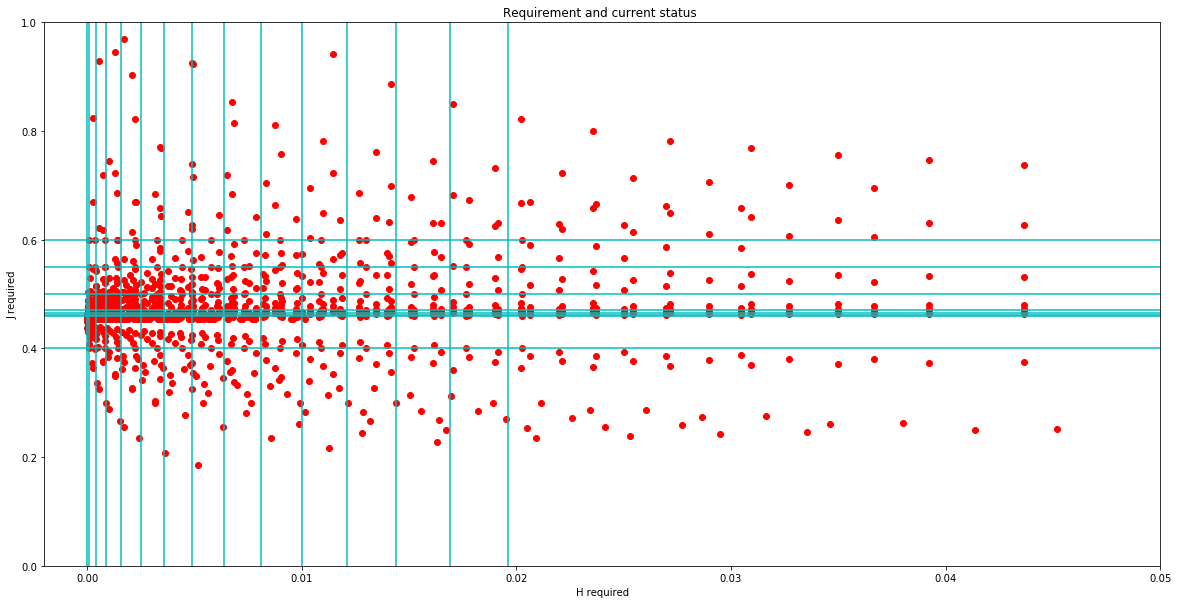

In [108]:
plt.figure(figsize=(20,10))
plt.ylim([0,1])
plt.xlim([-0.002,0.05])
y=linspace(-0.5,2,100)
for i in range(15):
    x=[(0.01*i)**2 for j in y]
    plt.plot(x,y,c='c')
x=linspace(-0.005,0.05,100)
for i in [0.6,0.5,0.4,0.46,0.47,0.465,0.462,0.550]:
    y=[i for j in x]
    plt.plot(x,y,c='c')

plt.scatter(H_arr,J_arr,c='r')
plt.ylabel('J required')
plt.xlabel('H required')
plt.title('Requirement and current status ')

## Histogram Verifcation

In [7]:
sim_data=read_generic_data('../extracted_data/HistogramAnalysis/N48_H0.0025_bs')
sim_data.keys()

9  DATA LINES READ


dict_keys(['#dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err'])

In [21]:
mh_data=read_generic_data('../extracted_data/HistogramAnalysis/N48_H0.0025_single_mh')
mh_data.keys()

19  DATA LINES READ


dict_keys(['L', 'J', 'Hx', 'E', 'E_err', 'M', 'M_err'])

<Container object of 3 artists>

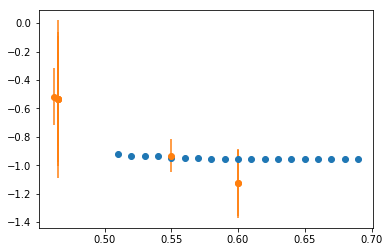

In [22]:
L=48
y=[i/L**3 for i in mh_data['E']]
y_err=[i/L**3 for i in mh_data['E_err']]
plt.errorbar(mh_data['J'],y,y_err,fmt='o')
plt.errorbar(sim_data['J'],sim_data['E'],sim_data['E_err'],fmt='o')

<Container object of 3 artists>

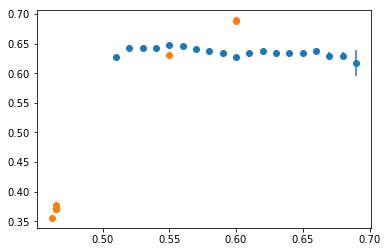

In [23]:
L=48
y=[i/L**3 for i in mh_data['M']]
y_err=[i/L**3 for i in mh_data['M_err']]
plt.errorbar(mh_data['J'],y,y_err,fmt='o')
plt.errorbar(sim_data['J'],sim_data['M0'],sim_data['M0_err'],fmt='o')

In [9]:
sim_dataA=read_generic_data('../extracted_data/HistogramAnalysis/N24_550_AVGBS')
sim_dataA.keys()
sim_data=read_generic_data('../extracted_data/HistogramAnalysis/N24_0.550_BS')
sim_data.keys()

16  DATA LINES READ
16  DATA LINES READ


dict_keys(['#dim', 'L', 'N', 'T', 'J', 'H0', 'E', 'E_err', 'M', 'M_err', 'SP_heat', 'SP_heat_err', 'SUCEP', 'SUCEP_err', 'M0', 'M0_err', 'M0_Bc', 'M1_Bc_err'])

In [10]:
mh_data=read_generic_data('../extracted_data/HistogramAnalysis/N24_0.550_MH')
mh_data.keys()

231  DATA LINES READ


dict_keys(['L', 'J', 'Hx', 'E', 'E_err', 'M', 'M_err'])

<Container object of 3 artists>

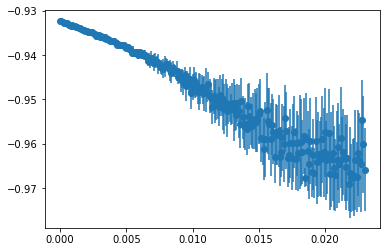

In [11]:
# plt.errorbar(sim_data['H0'],sim_data['E'],sim_data['E_err'],fmt='o')
# plt.errorbar(sim_dataA['H0'],sim_data['E'],sim_dataA['E_err'],fmt='o')
y=[i/24**3 for i in mh_data['E']]
y_err=[i/24**3 for i in mh_data['E_err']]
plt.errorbar(mh_data['Hx'],y,y_err,fmt='o')
# plt.ylim([-1.5,0])

<Container object of 3 artists>

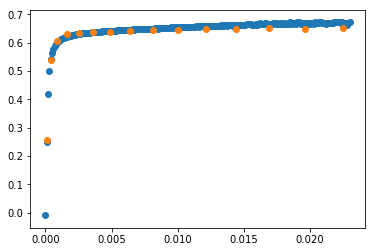

In [12]:
y=[i/24**3 for i in mh_data['M']]
y_err=[i/24**3 for i in mh_data['M_err']]
plt.errorbar(mh_data['Hx'],y,y_err,fmt='o')
plt.errorbar(sim_data['H0'],sim_data['M0'],sim_data['M0_err'],fmt='o')
# plt.ylim([0.5,0.7])

## Ploting Basic Version of scaling function

#### N = 24

In [9]:
f=read_generic_data('../extracted_data/GS_analysis/analysis24')

107  DATA LINES READ


#dim  =  3.0
L  =  24.0
N  =  0.0
T  =  1.0
J  =  0.462
H0  =  0.0001
E  =  -0.506818
E_err  =  0.00496324
M  =  0.32962
M_err  =  0.000121186
SP_heat  =  2.48538
SP_heat_err  =  0.00944734
SUCEP  =  17.9486
SUCEP_err  =  0.103002
M0  =  0.0730171
M0_err  =  0.00152017
M0_Bc  =  0.487092
M1_Bc_err  =  0.00190365
x =  -8.312906538709987
y =  0.49876206821105623

#dim  =  3.0
L  =  24.0
N  =  0.0
T  =  1.0
J  =  0.465
H0  =  0.0001
E  =  -0.525756
E_err  =  0.00523741
M  =  0.359583
M_err  =  9.20346e-05
SP_heat  =  2.38062
SP_heat_err  =  0.011657
SUCEP  =  12.6809
SUCEP_err  =  0.0637136
M0  =  0.0835839
M0_err  =  0.00189305
M0_Bc  =  0.493739
M1_Bc_err  =  0.00185585
x =  -11.421728572308787
y =  0.5709413114619193

#dim  =  3.0
L  =  24.0
N  =  0.0
T  =  1.0
J  =  0.55
H0  =  0.0001
E  =  -0.93217
E_err  =  0.00374171
M  =  0.642053
M_err  =  3.28503e-05
SP_heat  =  1.46105
SP_heat_err  =  0.00972563
SUCEP  =  1.31447
SUCEP_err  =  0.00805333
M0  =  0.261952
M0_err  =  0.0027826
M0_

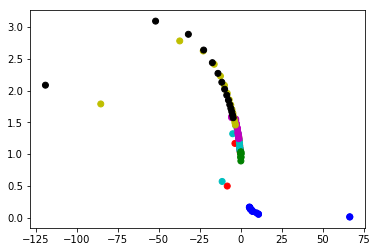

In [11]:
X=[]
Y=[]
Y_err=[]
col=[]
cdict={48:'b',24:'g',36:'r'}
cdict_temp={ 0.4:'b', 0.454165:'g', 0.462:'r', 0.465:'c',0.47:'m', 0.55:'y', 0.6:'k'}
for i in range(len(f['T'])):
    if f['L'][i]!=24 :
#         print(f['M0'][i],f['J'][i])
        continue    
    h=f['H0'][i]/(H0)
    t=(1/f['J'][i] - Tc)/T0
    temp=t/h**(1/(beta*delta))
    temp1=f['M0'][i]/(h**(1/delta))
    if temp1<0.8 and temp<0:
        for j in f.keys():
            print(j," = ",f[j][i])
        print("x = ",temp)
        print("y = ",temp1)
        print()
    if temp<-60:
        for j in f.keys():
            print(j," = ",f[j][i])
        print("x = ",temp)
        print("y = ",temp1)
        print()
#         continue
    X.append(temp)
    Y.append(temp1)
    Y_err.append(f['M0_err'][i]/(1/h**(1/delta)))
#     col.append(cdict[f['L'][i]])
    col.append(cdict_temp[f['J'][i]])
plt.scatter(X,Y,c=col)
print("cdict_temp={ 0.4:'b', 0.454165:'g', 0.462:'r', 0.465:'c',0.47:'m', 0.55:'y', 0.6:'k'}")

### N =  48

In [110]:
f=read_generic_data('../extracted_data/GS_analysis/analysis48')

143  DATA LINES READ


In [111]:
unique(f['J'])

array([0.4     , 0.454165, 0.46    , 0.462   , 0.465   , 0.47    ,
       0.55    , 0.6     ])

cdict_temp={ 0.4:'b', 0.454165:'w', 0.462:'r', 0.460:'y', 0.465:'c',0.47:'m', 0.55:'g', 0.6:'k'}


(1, 2)

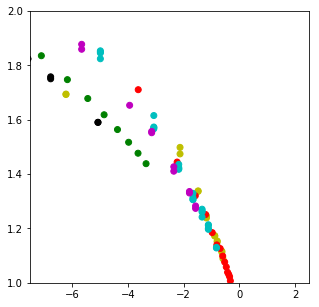

In [117]:
X=[]
Y=[]
Y_err=[]
col=[]
cdict={48:'b',24:'g',36:'r'}
plt.figure(figsize=(5,5))
cdict_temp={ 0.4:'b', 0.454165:'w', 0.462:'r', 0.460:'y', 0.465:'c',0.47:'m', 0.55:'g', 0.6:'k'}
for i in range(len(f['T'])):
    if f['L'][i]!=48 :
#         print(f['M0'][i],f['J'][i])
        continue    
    h=f['H0'][i]/(H0)
    t=(1/f['J'][i] - Tc)/T0
    temp=t/h**(1/(beta*delta))
    temp1=f['M0'][i]/(h**(1/delta))
#     if temp1<0.8 and temp<0:
#         for j in f.keys():
#             print(j," = ",f[j][i])
#         print("x = ",temp)
#         print("y = ",temp1)
#         print()
#         continue
    X.append(temp)
    Y.append(temp1)
    Y_err.append(f['M0_err'][i]/(1/h**(1/delta)))
#     col.append(cdict[f['L'][i]])
    col.append(cdict_temp[f['J'][i]])
print("cdict_temp={ 0.4:'b', 0.454165:'w', 0.462:'r', 0.460:'y', 0.465:'c',0.47:'m', 0.55:'g', 0.6:'k'}")
plt.scatter(X,Y,c=col)
plt.xlim([-7.5,2.5])
plt.ylim([1,2])

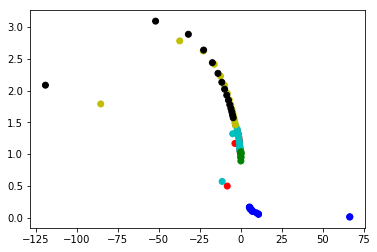

In [69]:
plt.scatter(X,Y,c=col)
# plt.xlim([-20,0])
# plt.ylim([0,3])

In [34]:
x=[i/j**(1/beta) for i ,j in zip(X,Y)]
y=[i**(-1/delta) for i in Y]

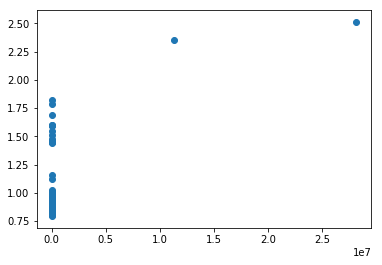

In [35]:
plt.scatter(x,y)

## Histogram analysis for resamplings

In [13]:
f=get_data_OnModel('../../raw_data_serc/progress_folder/48/N48_0.400_compiled/history/LId_9_L_48_T_1.000_J_0.400_H_[0.00560|0.00000]O2.txt')
f.keys()

dict_keys(['params', 'istate', 'fstate', 'time', 'energy', 'magentization', 'magentization_n'])

{'dim': 3, 'n': 2, 'length of lattice': 48, 'Number of sites': 0, 'T': 1, 'beta': 1, 'J': 0.4, 'H0': 0.0056, 'H1': 0, 'Initialization': 'Z', 'sweeps': 50211, 'urd_seed': 9, 'initialization_seed': 1550834079, 'remarks ': ' file made with the c++ code : O(n) model', 'UPDATE HISTORY ': ' Sat Feb 23 14:34:24 2019'}


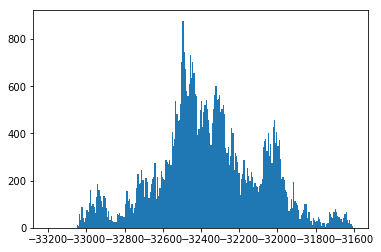

In [15]:
print(f['params'])
x=plt.hist(f['energy'],bins=250)

In [28]:
f=get_data_OnModel('../../raw_data_serc/progress_folder/48/N48_0.550_compiled/history/LId_13_L_48_T_1.000_J_0.550_H_[0.00360|0.00000]O2.txt')
f.keys()

dict_keys(['params', 'istate', 'fstate', 'time', 'energy', 'magentization', 'magentization_n'])

{'dim': 3, 'n': 2, 'length of lattice': 48, 'Number of sites': 0, 'T': 1, 'beta': 1, 'J': 0.55, 'H0': 0.0036, 'H1': 0, 'Initialization': 'Z', 'sweeps': 100431, 'urd_seed': 13, 'initialization_seed': 1550419912, 'remarks ': ' file made with the c++ code : O(n) model', 'UPDATE HISTORY ': ' Tue Feb 19 09:14:06 2019'}

 -104160.0 -101733.0


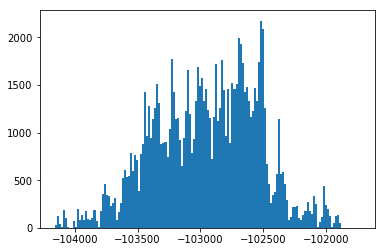

In [29]:
print(f['params'])
print("\n",min(f['energy']),max(f['energy']))
x=plt.hist(f['energy'],bins=150)

In [30]:
f=get_data_OnModel('../simulation_data/resampled/N48_0.550/LId_13_L_48_T_1.000_J_0.550_H_[0.00360|0.00000]O2.txt')
f.keys()

dict_keys(['params', 'istate', 'fstate', 'time', 'energy', 'magentization', 'magentization_n'])

{'dim': 3, 'n': 2, 'length of lattice': 48, 'Number of sites': 0, 'T': 1, 'beta': 1, 'J': 0.55, 'H0': 0.0036, 'H1': 0, 'Initialization': 'Z', 'sweeps': 96, 'urd_seed': 13, 'initialization_seed': 1550419912, 'remarks ': ' file made with the c++ code : O(n) model', 'UPDATE HISTORY ': ' Tue Feb 19 09:14:06 2019'}

 -103718.0 -102163.0


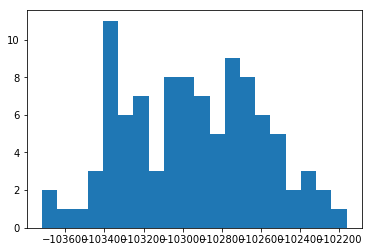

In [31]:
print(f['params'])
print("\n",min(f['energy']),max(f['energy']))
x=plt.hist(f['energy'],bins=20)